# PROYECTO CLUSTERIZAION

### Objetivo:

El objetivo es agrupar los frijoles en varios clusters según sus características físicas (como tamaño, peso, forma, entre otras), con el fin de identificar patrones o grupos dentro de los datos. Este proceso permite determinar si un frijol cumple con los estándares de calidad, facilitando la identificación de frijoles defectuosos o fuera de los parámetros esperados. Al analizar los siete tipos de frijoles presentes en el estudio, se pueden diferenciar y agrupar según sus características, permitiendo que el sistema detecte automáticamente posibles desviaciones o anomalías.

Esto lo realizaremos usando como primera instancia el procedimiento ETL para la Extraccion, Transformacion y Carga de los datos, realizandolo asi:

* Extracción: Obtener los datos de características del dataset "Dry Bean" y preparar para su análisis.
* Transformación:
    - Manejo de datos faltantes.
    - Estandarización de las características.
    - Análisis exploratorio para entender la distribución y relaciones entre las variables.
* Carga:
    - Determinación del número óptimo de clusters.
    - Aplicación de K-means para agrupar los frijoles en clusters.
    - Visualización y análisis post-clustering.

## Exploracion

In [19]:
import pandas as pd

# Cargar dataset especificando el separador como punto y coma
dry_bean = pd.read_csv('Dry_Bean_Dataset.csv', sep=';')
# dry_bean = pd.read_csv('Dry_Bean_Dataset.csv', sep=';', usecols=['Eccentricity', 'AspectRation', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'])

# Mostrar las primeras filas del dataset para verificar la carga correcta
dry_bean.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,"610,291","208,1781167","173,888747","1,197191424","0,549812187",28715,"190,1410973","0,763922518","0,988855999","0,958027126","0,913357755","0,007331506","0,003147289","0,834222388","0,998723889",SEKER
1,28734,"638,018","200,5247957","182,7344194","1,097356461","0,411785251",29172,"191,2727505","0,783968133","0,984985603","0,887033637","0,953860842","0,006978659","0,003563624","0,909850506","0,998430331",SEKER
2,29380,"624,11","212,8261299","175,9311426","1,209712656","0,562727317",29690,"193,4109041","0,778113248","0,989558774","0,947849473","0,908774239","0,007243912","0,003047733","0,825870617","0,999066137",SEKER
3,30008,"645,884","210,557999","182,5165157","1,153638059","0,498615976",30724,"195,4670618","0,782681273","0,976695743","0,903936374","0,928328835","0,007016729","0,003214562","0,861794425","0,994198849",SEKER
4,30140,"620,134","201,8478822","190,2792788","1,06079802","0,333679658",30417,"195,896503","0,773098035","0,99089325","0,984877069","0,970515523","0,00669701","0,003664972","0,941900381","0,999166059",SEKER


In [22]:
# Tipos de datos de cada columna
print(dry_bean.dtypes)

Area                int64
Perimeter          object
MajorAxisLength    object
MinorAxisLength    object
AspectRation       object
Eccentricity       object
ConvexArea          int64
EquivDiameter      object
Extent             object
Solidity           object
roundness          object
Compactness        object
ShapeFactor1       object
ShapeFactor2       object
ShapeFactor3       object
ShapeFactor4       object
Class              object
dtype: object


Segun podemos observar, la variables no son del mismo tipo y esto podria generar problemas futuros, por lo cual, segun lo visto en los datos marcados por **head()**, pasaremos todas las variables a tipo **float** excepto la variable 'Class' que se necesita como un **string** ya que sirve como etiqueta y las variables que ya de por si son **integer**  como 'Area' y 'ConvexArea'.

In [29]:
# Columnas que deben ser convertidas a float
columns_to_convert = [
    'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
    'Eccentricity', 'EquivDiameter', 'Extent', 'Solidity', 'roundness',
    'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'
]

# Reemplazar comas por puntos y convertir a float
for col in columns_to_convert:
    dry_bean[col] = dry_bean[col].str.replace(',', '.').astype(float)

# Verificar los tipos de datos después de la conversión
print(dry_bean.dtypes)

# Verificar los primeros valores para asegurarse de que la conversión fue exitosa
print(dry_bean.head())


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       2

In [30]:
# Dimensiones del dataset
print("Dimensiones del dataset:", dry_bean.shape)

# Descripción estadística básica
print(dry_bean.describe())

Dimensiones del dataset: (13611, 17)
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.

Con esto podemo evidenciar la varianza de la variable y tener en cuenta cuales pueden llegara a ser mas o mejnos convenientes para el deasrrollo de esta olucion, entendiendo en mejor medida el comportamineto de las variable, concluyendo que, variables como Solidity, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4 tienen una baja variabilidad por su cercania a la media, y variables como Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Roundness, Compactness tienden a tener mas variabilidad en us datos.

In [33]:
# Comprobar si hay valores nulos
print(dry_bean.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


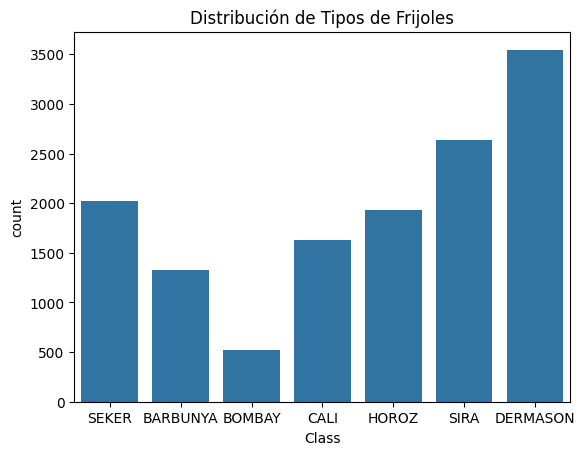

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de las diferentes clases de frijol
sns.countplot(x='Class', data=dry_bean)
plt.title('Distribución de Tipos de Frijoles')
plt.show()


Esto se realiza para determinar la cantidad de variables de frijol que existen, conocer su clasificacion y cuantas muestras tenemo de cada una a nuetra disposicion, concluyendo que tenemos 7 tipos diferentes de los cuales se puede evidenciar uina clara diferencia de datos entre las muestras.

Teniendo en cuenta esto podemos generar una columna o variable diferente para cada una de las clasificaciones para asi no generar inconvenientes futuras con nuna variable tipo String en la data.

In [35]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(dry_bean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Características')
plt.show()


ValueError: could not convert string to float: 'SEKER'

<Figure size 1200x800 with 0 Axes>

## Transformacion

### Verificamos si existen valores nulos o faltantes

In [6]:
# Verificar valores nulos
print(X.isnull().sum())


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


### Estandarizamos y entrenamos la data para que no haya conflicto al momento de realizar el analisis

In [7]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# from sklearn import preprocessing

# X_train_norm = preprocessing.normalize(X_train)
# X_test_norm = preprocessing.normalize(X_test)


### Analisis de la data

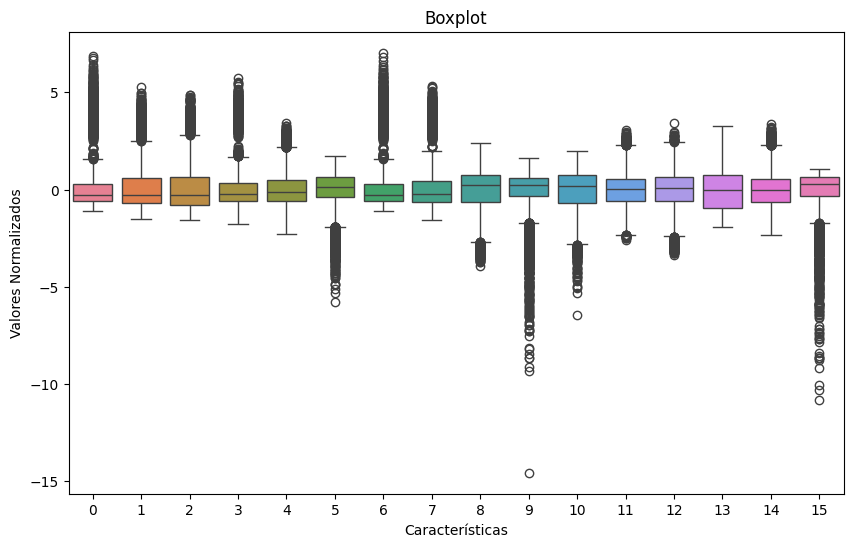

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para cada variable significativa
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled)
plt.title("Boxplot")
plt.xlabel("Características")
plt.ylabel("Valores Normalizados")
plt.show()


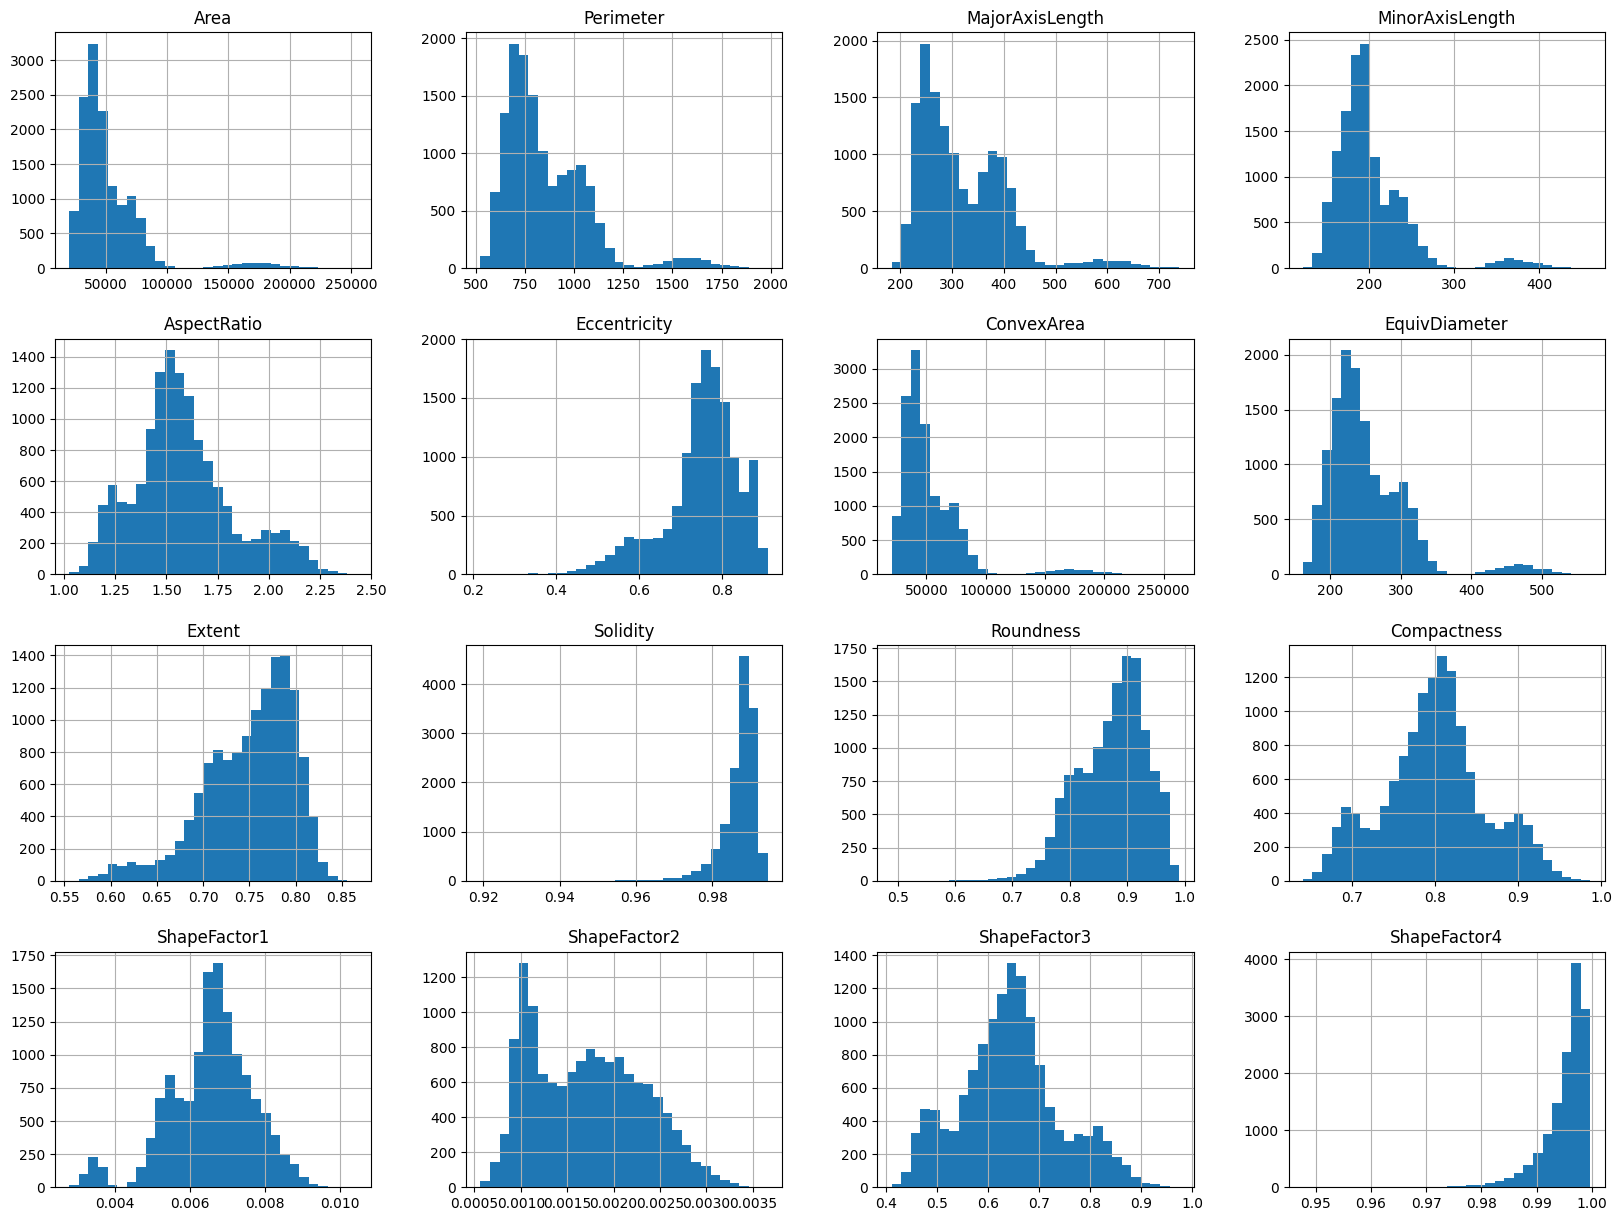

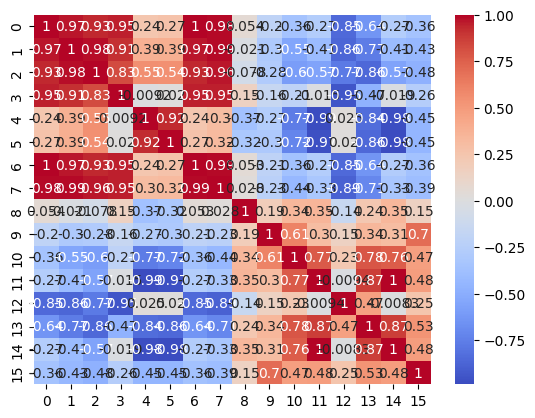

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

# Histograma de cada característica
X.hist(bins=30, figsize=(20,15))
plt.show()

# Gráfico de correlación para ver relaciones entre características
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm')
plt.show()


En la mayoria de muestras de frijoles podemos evidenciar que son pocos los datos atipicos relevantes, ademas las muestras generan una tendencia de ser mas compactos y obalados.

En el mapa de calor se puede evidenciar clara correlacion entre variable que se necesitan entre si como el area, el perimetro y lo compato, valores que se puede llegar a inferir que si uno disminuye por ente los demas tambien lo haran.

## Carga


### Usando el metodo del codo buscaremos la cantidad de clusters que usaremos

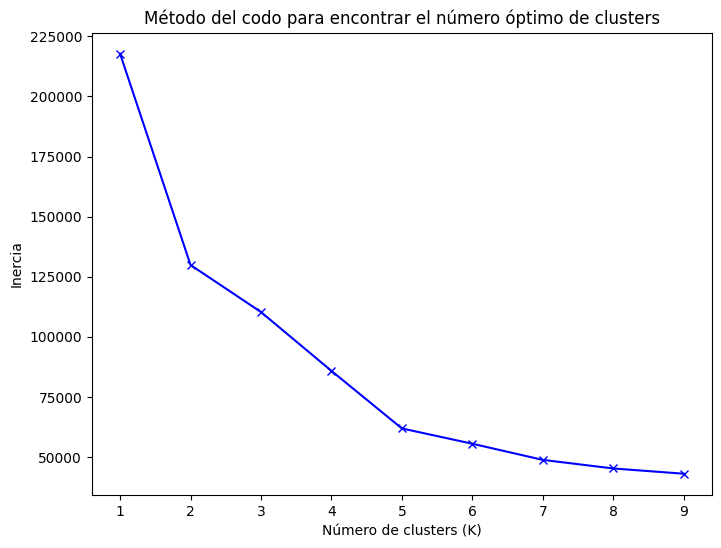

In [9]:
from sklearn.cluster import KMeans

# Probar diferentes valores de K
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()

Revisando la grafica podemos concluir que la cantidad optima de clusters seria 5, ya que es el momento en el cual el pico mas relevante termina y comienza a "estavilizarse" el modelo en los siguientes.

Puntuación promedio de silueta: 0.35689848623167025


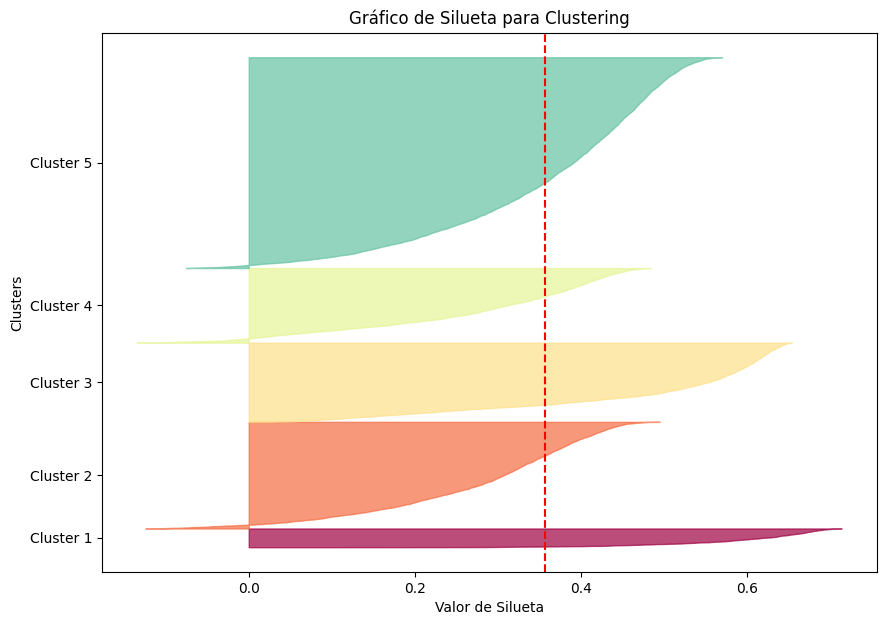

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Aplicar K-Means con un número de clusters arbitrario
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Calcular el puntaje de silueta
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Puntuación promedio de silueta: {silhouette_avg}")

# Crear el gráfico de silueta
y_lower, y_upper = 0, 0
n_clusters = len(np.unique(cluster_labels))
yticks = []

plt.figure(figsize=(10, 7))

for i in range(n_clusters):
    # Agregar las puntuaciones de silueta para cada cluster
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    
    y_upper += len(ith_cluster_silhouette_vals)
    color = plt.cm.Spectral(float(i) / n_clusters)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    
    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Añadir una línea que indique el promedio de la puntuación de silueta
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, [f'Cluster {i+1}' for i in range(n_clusters)])
plt.xlabel('Valor de Silueta')
plt.ylabel('Clusters')
plt.title('Gráfico de Silueta para Clustering')
plt.show()

### Entrenamiento del modelo

In [11]:
# Aplicar K-means con el número óptimo de clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Obtener los clusters asignados a cada frijol
clusters = kmeans.labels_

# Añadir los clusters al DataFrame original
X['Cluster'] = clusters


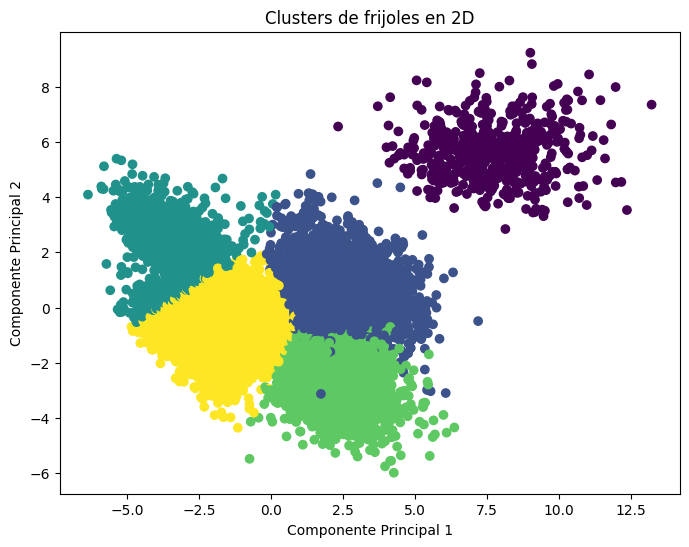

In [12]:
from sklearn.decomposition import PCA

# Reducir las dimensiones a 2 para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clusters en 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de frijoles en 2D')
plt.show()